<h1>Кластеризация</h1>

Выделяют несколько групп методов обучения без учителя:
* кластеризация;
* поиск правил ассоциации;
* заполнение пропущенных значений;
* сокращение размерности.

Под кластеризацией понимается ситуация, в которой у нас нет значений целевой переменной, но ее необходимо приписать каждому из объектов.
* Дано множество объектов $X = \{x_1, x_2, \dots, x_N\}$.
* Дано множество классов $C = \{c_1, c_2, \dots, c_K\}$.
* Необходимо найти функцию $f(X) \rightarrow C$.


## Метод к-средних (k-means)

**Постановка задачи**

* Дано множество объектов $X = \{x_1, x_2, \dots, x_N\}$
* Кластер $C_k \Leftrightarrow \text{ центроид } \mu_k$
* Объект $x_i \in C_k \Leftrightarrow \mu_k = \arg \min\limits_{\mu_j} \|x_i - \mu_j \|^2$
* Надо найти такое разбиение на $K$ кластеров, чтобы минизировать
$$ L(C) = \sum_{k=1}^K\sum_{i\in C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_C $$
$$\mu_k = \frac{1}{|C_k|} \sum _{x_n \in C_k} x_n$$

** Алгоритм работы**
1. Выбрать $K$ начальных центроидов случайным образом  $rnd() \rightarrow \mu_k, \ k=1\dots K$
2. Для каждой точки из набора данных присвоить кластер, соответствующий ближайшему центроиду
$$C_k = \{x_n : argmin_{k=1 \dots K}(||x_n - \mu_k||^2)\} $$
3. Обновить центроиды: 
$$\mu_k = \frac{1}{|C_k|} \sum _{x_n \in C_k} x_n$$
4. Повторять 2 и 3 до тех пор, пока изменения перестанут быть существенными 

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from ipywidgets import interact, IntSlider, fixed, FloatSlider

In [2]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
def drawClusters(n=2):
    
    X, y = make_blobs(n_samples=500,
                      n_features=2,
                      centers=4,
                      cluster_std=1,
                      center_box=(-10.0, 10.0),
                      shuffle=True,
                      random_state=1) 

    #kmeans = KMeans(n_clusters=n, random_state=1).fit(X)
    kmeans = KMeans(n_clusters=n).fit(X)

    fig, ax = plt.subplots(1,1)
    ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
    
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  marker='o', c="white", alpha=1, s=200)
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    for i, c in enumerate(kmeans.cluster_centers_):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    plt.show()
    
interact(drawClusters, n=IntSlider(min=2,max=8,step=1,value=2));
    

Проблемы:
* разбиение на кластеры неустойчивое;
* сколько кластеров брать неясно;
* все кластеры по определению выпуклые.

Достоинства:
* простой и эффективный как палка;
* очень быстрый;
* хорошее первое приближение;
* имеет массу модификаций;
* интерпретируемые результаты.

**Хорошее первое приближение.**

### Как выбрать k?

**Elbow method (Метод локтя)**
* Критерий минимизации k-means
$$ L(C) = \sum_{k=1}^K\sum_{i\in C_k} ||x_i - \mu_k||^2 \rightarrow \min\limits_C $$
* Давайте возьмем всевозможные $K$, для каждого запустим алгоритм, посчитаем на результате $L(C)$ и выберем минимум!

In [4]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 


crit = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    crit.append(np.sqrt(kmeans.inertia_))
    
def elbow_demo(k=2):
    
    X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
    
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].scatter(X[:,0], X[:,1], c=kmeans.labels_)
    
    ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  marker='o', c="white", alpha=1, s=200)
    
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')

    for i, c in enumerate(kmeans.cluster_centers_):
        ax[0].scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        
    ax[1].plot(range(2,8), crit, marker='s')
    
    ax[1].set_xlabel('$k$')
    ax[1].set_ylabel('$L^{(k)}(C)$')
    
    plt.show()
    
    
    

In [5]:
interact(elbow_demo, k=IntSlider(min=2,max=8,step=1,value=2));

### Dunn Index

Введем обозначения:
* $\delta(C_k,C_l) = \min\limits_{x_i\in C_k, x_j \in C_l}d(x_i, x_j) $ - расстояние между кластерами $C_k, C_l$
* $\Delta(C_k) = \max\limits_{x_i, x_j \in C_k}d(x_i, x_j)$ - диаметр кластера

Тогда 
$$DI = \frac{\min\limits_{k \neq l} \delta(C_k, C_l)}{\max\limits_{(C_k)} \Delta(C_k)} $$

*Существует несколько вариаций данного индекса*

### Davies–Bouldin Index

Введем обозначения
* $S(C_k) = 1/|C_k|\sum\limits_{x_i \in C_k} d(x_i, \mu_{c_k})$ - разброс данных внутри кластера $C_k$

$$ DB = \frac{1}{K}\sum\limits_{C_k}\max\limits_{C_l \neq C_k}\frac{S(C_K) + S(C_l)}{d(\mu_{c_k}, \mu_{c_l})} $$

*Существует несколько вариаций данного индекса*

### Критерий Silhouette

Пусть дана кластеризация в $K$ кластеров, и объект $i$ попал в $C_k$

* $a(i)$ -- среднее расстояние от $i$ объекта до объектов из $C_k$
* $b(i) = min_{j \neq k} b_j(i)$,  где $b_j(i)$ -- среднее расстояние от $i$ объекта до объектов из $C_j$
$$
silhouette(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$
Средний silhouette для всех точек из $\mathbf{X}$ является критерием качества кластеризации.

Если мы знаем истинное разбиение объектов на классы, то можно посчитать 
### Rand Index

$$ \text{Rand}(\hat{\pi},\pi^*) = \frac{a + d}{a + b + c + d} \text{,}$$
где 
* $a$ - количество пар объектов, находящихся в одинаковых кластерах в $\hat{\pi}$ и
$\pi^*$ (true positive);
* $b$ ($c$) - количество пар объектов в одном и том же кластере в  $\hat{\pi}$ ($\pi^*$), но в разных в  $\pi^*$ ($\hat{\pi}$) (false positive, false negative);
* $d$ - количество пар объектов в разных кластерах в $\hat{\pi}$ и $\pi^*$ (true negative).


### Adjusted Rand Index - корректировка Rand index:

$$\text{ARI}(\hat{\pi},\pi^*)   = \frac{\text{Rand}(\hat{\pi},\pi^*) - \text{Expected}}{\text{Max} - \text{Expected}}$$


Вот [здесь](https://scikit-learn.org/0.21/modules/classes.html#clustering-metrics) есть еще куча разных метрик.

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score


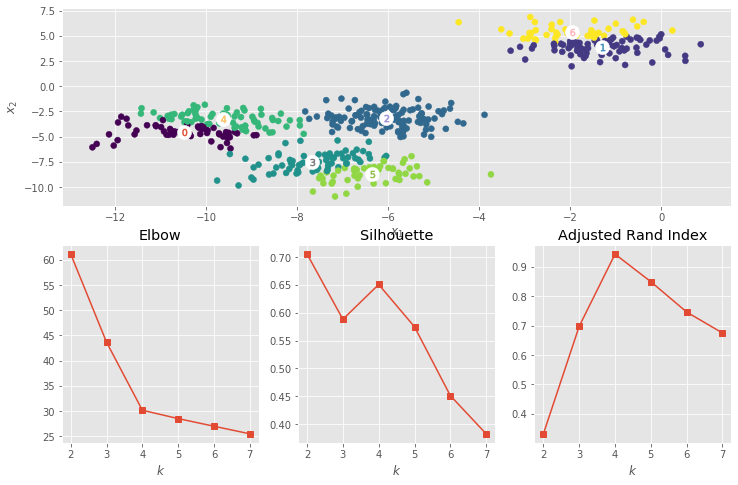

In [7]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 


crit = []
sil = []
ari = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    crit.append(np.sqrt(kmeans.inertia_))
    sil.append(silhouette_score(X, kmeans.labels_))
    ari.append(adjusted_rand_score(y, kmeans.labels_))
    
ax1 = plt.subplot(211)

ax1.scatter(X[:,0], X[:,1], c=kmeans.labels_)

ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              marker='o', c="white", alpha=1, s=200)

ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')

for i, c in enumerate(kmeans.cluster_centers_):
    ax1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

ax2 = plt.subplot(234)
ax2.plot(range(2,8), crit, marker='s')
ax2.set_xlabel('$k$')
ax2.set_title('Elbow')

ax3 = plt.subplot(235)
ax3.plot(range(2,8), sil, marker='s')
ax3.set_xlabel('$k$')
ax3.set_title('Silhouette')

ax4 = plt.subplot(236)
ax4.plot(range(2,8), ari, marker='s')
ax4.set_xlabel('$k$')
ax4.set_title('Adjusted Rand Index')

plt.show()



### Пришла пора поработать

Берем набор данных с ирисами, рассчитываем оптимальное количество кластеров по метрике, которая нравится больше всего.

## Иерархическая кластеризация

** Аггломеративные алгоритмы: **
* начинаем с ситуации, когда каждый объект - отдельный кластер;
* на каждом шаге совмещаем два наиболее близких кластера;
* останавливаемся, когда получаем требуемое количество или единственный кластер.


** Дивизивные алгоритмы: **
* начинаем с ситуации, когда все объекты составляют один кластер;
* на каждом шаге разделяем один из кластеров пополам;
* останавливаемся, когда получаем требуемое количество или $N$ кластеровю


## Пересчет расстояний после объединения кластеров

* Single linkage
$$ d_{min}(C_i, C_j) = \min_{\mathbf{x} \in C_i, \mathbf{x}' \in C_j} d(\mathbf{x}, \mathbf{x}' ) $$

* Complete linkage
$$ d_{max}(C_i, C_j) = \max_{\mathbf{x} \in C_i, \mathbf{x}' \in C_j} d(\mathbf{x},\mathbf{x}') $$

* Average linkage
$$ d_{avg}(C_i, C_j) = \frac{1}{n_i n_j}\sum_{\mathbf{x} \in C_i}\sum_{\mathbf{x}' \in C_j} d(\mathbf{x}, \mathbf{x}' ) $$

* Centroid linkage
$$ d_{cent}(C_i, C_j) = \|\mu_i -\mu_j \|^2 $$

* Ward linkage
$$ d_{ward}(C_i, C_j) = \sqrt{\frac{n_i n_j}{n_i + n_j}} \|\mu_i - \mu_j \|^2$$


In [8]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

In [9]:
X = np.array([
        [1,1],
        [2,2],
        [2, 2.5],
        [5, 2],
        [4.5, 5],
        [3, 6],
        [5, 6],
        [6, 6]
    ])

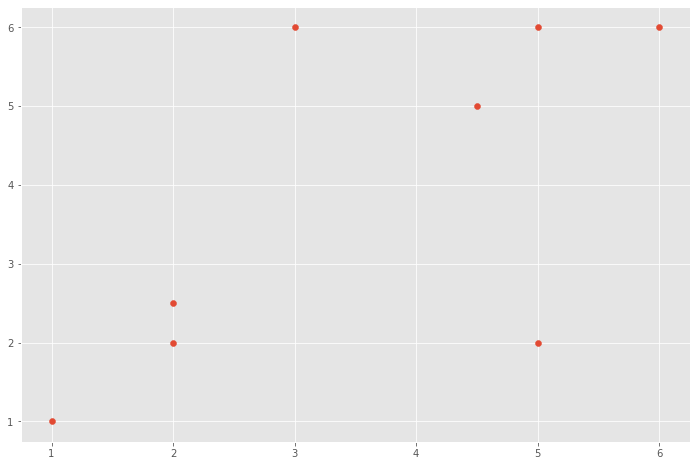

In [10]:
plt.scatter(X[:,0], X[:,1]);

In [11]:
Z = linkage(X, method='single', metric='euclidean')

In [12]:
Z

array([[ 1.        ,  2.        ,  0.5       ,  2.        ],
       [ 6.        ,  7.        ,  1.        ,  2.        ],
       [ 4.        ,  9.        ,  1.11803399,  3.        ],
       [ 0.        ,  8.        ,  1.41421356,  3.        ],
       [ 5.        , 10.        ,  1.80277564,  4.        ],
       [ 3.        , 11.        ,  3.        ,  4.        ],
       [12.        , 13.        ,  3.04138127,  8.        ]])

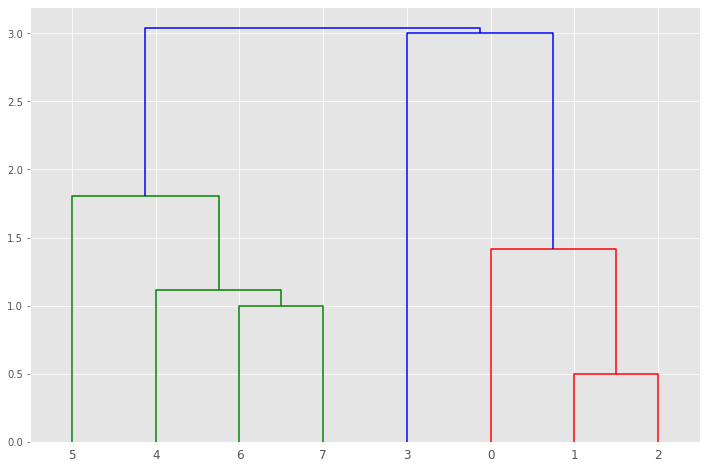

In [13]:
dend = dendrogram(Z)

In [14]:
fcluster(Z, 2.5, criterion='distance')

array([2, 2, 2, 3, 1, 1, 1, 1], dtype=int32)

In [15]:
fcluster(Z, 1, criterion='distance')

array([5, 4, 4, 6, 2, 3, 1, 1], dtype=int32)

In [16]:
fcluster(Z, 6, criterion='maxclust')

array([5, 4, 4, 6, 2, 3, 1, 1], dtype=int32)

### Меры близости

$$ d(a, b) = \sum\limits_{i=1}^{D}(a_i - b_i)^2 \text{: euclidean distance} $$

$$ d(a, b) = \sum\limits_{i=1}^{D}|a_i - b_i| \text{: manhattan distance} $$

$$ d(a, b) = \frac{\langle a,b \rangle}{||a||\cdot||b||} \text{: cosine similarity} $$


**Кофенетическое расстояние** между объектами $x_i$ и $x_j$ - высота дерева, при котором эти объекты объединились.
<center><img src='img/dendro2.png' width=700></center>

**Кофенетическая корреляция** — коэффициент корреляции между массивами попарных расстояний и попарных кофенетических расстояний.

$$ \text{cophCorr} = \frac{\sum\limits_{i < j}(d(x_i, x_j) - \bar{d})(coph(x_i, x_j) - \bar{coph})}{\sqrt{\sum\limits_{i < j}(d(x_i, x_j) - \bar{d})^2 \cdot \sum\limits_{i < j}(coph(x_i, x_j) - \bar{coph})^2}} $$

При "удачно" построенном дереве эти массивы должны сильно коррелировать.

In [17]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet


In [18]:
def coph_demo(link='single', metric='euclidean', k=2):
    
    X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
    
    d = pdist(X, metric=metric)
    
    Z = linkage(X, method=link, metric=metric)
    labels = fcluster(Z,  k, criterion='maxclust')
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].scatter(X[:,0], X[:,1], c=labels)
        
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')
        
    dend = dendrogram(Z, ax=ax[1], truncate_mode='lastp')   
    coph_corr, coph_dist = cophenet(Z, d)
    
    ax[1].set_title('cophCorr = %.3f' % coph_corr)
    
    plt.show()
    
    pdist

In [19]:
interact(coph_demo, k=IntSlider(min=2, max=10, step=1, value=2), link=['complete', 'single', 'average', 'centroid'], metric=['euclidean', 'cityblock', 'cosine']);

---

## Методы, основанные на плотности

Вместо того, чтобы оценивать расстояния между объектами, начнем оценивать плотность расположения объектов.

### Метод DBSCAN

Основные положения.
1. Составляем кластер состоит не меньше чем из $n$ объектов, расположеных не дальше, чем $\epsilon$. Берем для него $n$ самых близко расположенных точек.
2. Добавляем все точки, расположенные ближе чем $\epsilon$ к точкам, которые уже есть в кластере.
3. Повторяем п. 2 пока есть что добавлять.
4. Повторяем пп. 1-3 пока образуются кластеры.
5. Помечаем все оставшиеся точки как не объединенные в кластеры (кластер точек, для которых кластеризация не была проведена).

[Он-лайн демо для DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

![](img/dbscan.jpg)

Попробуемм кластеризовать ирисы Фишера.

In [8]:
# Берем метод DBSCAN
from sklearn.cluster import DBSCAN
# Подключаем набор данных.
from sklearn.datasets import load_iris

In [25]:
# Загружаем набор данных.
iris = sns.load_dataset('iris')

In [26]:
def dbscan_demo(eps=1, min_pts=5):
    
    dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    
    iris['labels'] = dbscan.labels_+1
    
    plt.figure(figsize=(7,5))
    plt.scatter(iris.iloc[:,0], iris.iloc[:,3], c=dbscan.labels_+1)
    
    plt.show()

In [28]:
interact(dbscan_demo, eps=FloatSlider(min=0.1, max=3, step=0.05, value=1), min_pts=IntSlider(min=2, max=15, step=1, value=5));

In [288]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label,labels
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1


Для того, чтобы правильно выбрать $\epsilon$ можно посмотреть, чему равно для каждой точки среднее расстояние до нескольких ближайших точек. Если выбрать $\epsilon$ больше, чем максимальное среднее расстояние, то всё точки "слипнутся" в один кластер. Если выбрать меньше, чем минимальное среднее, то скорее всего, все точки окажутся в разных кластерах. Лучше выбирать значение из диапазона, в котором наблюдается устойчивое значение среднего.

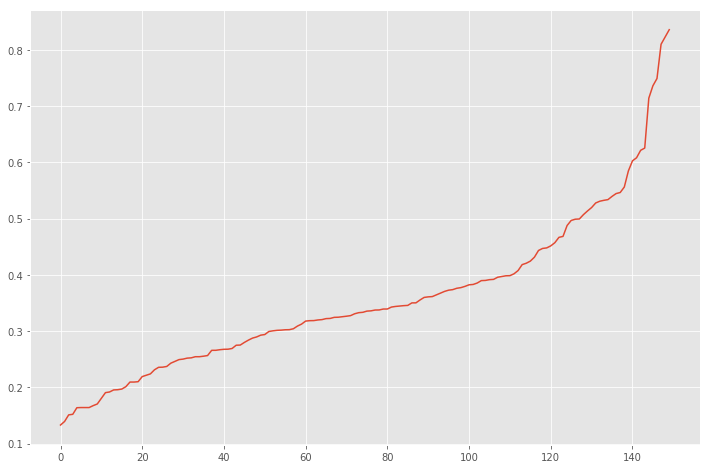

In [304]:
neighbours=[]
for v1 in iris.iloc[:,:4].iterrows():
    neighbours.append(np.mean(sorted([np.linalg.norm(v1[1]-v2[1]) for v2 in iris.iloc[:,:4].iterrows()])[1:6]))
neighbours=sorted(neighbours)
fig, ax = plt.subplots()
ax.plot(range(len(neighbours)), neighbours)
plt.show()

А теперь попробуем провести кластеризацию изображений.


Точек в ней слишком много, поэтому $\epsilon$ будем выбирать <strike>на глаз</strike> исходя из общих соображений.

In [2]:
from scipy import ndimage, misc
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [3]:
# Возьмем уже знакомую картинку.
image = Image.open('data/MIEM_1.jpg')
pix3 = image.load()

In [16]:
# Создаем объект для кластеризации.
#db=DBSCAN(eps=4, min_samples=3, n_jobs=4)
db=KMeans(n_clusters=100, n_jobs=4)

data = [(x, y, pix3[x, y][0], pix3[x, y][1], pix3[x, y][2]) for x in range(image.size[0]) for y in range(image.size[1])]

db_clusters=db.fit_predict(data)

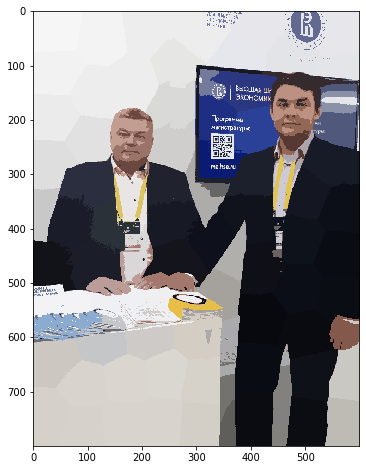

In [35]:

for p, c in zip(data, db_clusters):
    pix3[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                        int(db.cluster_centers_[c, 3]), 
                        int(db.cluster_centers_[c, 4]))
    
plt.rcParams['figure.figsize'] = (12, 8)    
ax = plt.subplot()
ax.imshow(image);


Посмотрим какого цвета получились центроиды на лицах.

In [54]:
# Несколько более удобно было бы использовать TKInter и событие перемещения мыши, чем определять на глаз.
pix3[200, 200], pix3[450, 150]

((156, 115, 104), (188, 145, 129))

Возьмем другое изображение и попробуем детектировать на нем лица. Для этого кластеризуем изображени и найдем кластеры с центроидами со сходным цветом.

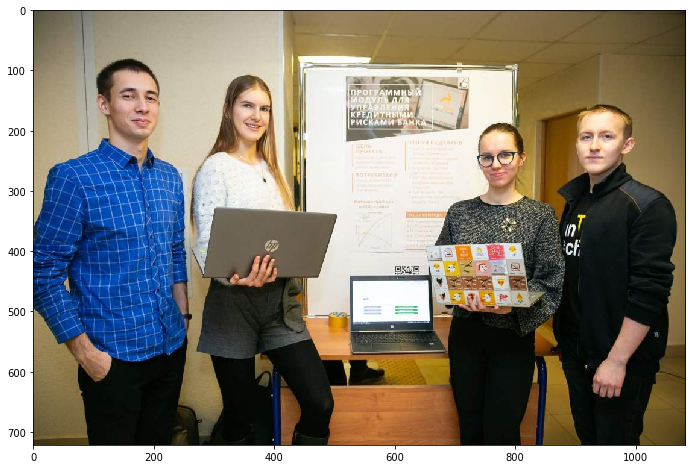

In [47]:
pix4 = np.array(Image.open('data/3ZbA2VcvyR5I.jpg'))
ax = plt.subplot()
ax.imshow(pix4);


In [41]:
data2 = [(x, y, pix4[x, y][0], pix4[x, y][1], pix4[x, y][2]) for x in range(pix4.shape[0]) for y in range(pix4.shape[1])]

db_clusters=db.fit_predict(data2)

In [59]:
# Этот код содержит в себе определенное количество неправильных решений. 
# Поэтому он работает медленно.
near = []
for i, c in enumerate(db.cluster_centers_):
    if abs(c[2]-156)+abs(c[3]-115)+abs(c[4]-104)<30 or abs(c[2]-188)+abs(c[3]-145)+abs(c[4]-129)<30:
        print(i, c)
        near.append(i)
        
# Более быструю реализацию вы можете сделать сами, так как
# ВЫ ГОТОВЫ К ВЫПОЛНЕНИЮ ЛАБОРАТОРНОЙ РАБОТЫ 1.2.

18 [473.01541683 279.90940236 157.01065855 132.61629235 101.44822992]
38 [578.85863359 970.55699941 182.79838551 135.51388069 120.05867297]
94 [179.33813109 154.89061116 150.62201063 110.72630647  90.34654562]


Перерисуем изображение на черном фоне, оставив только кластеры с лицами.

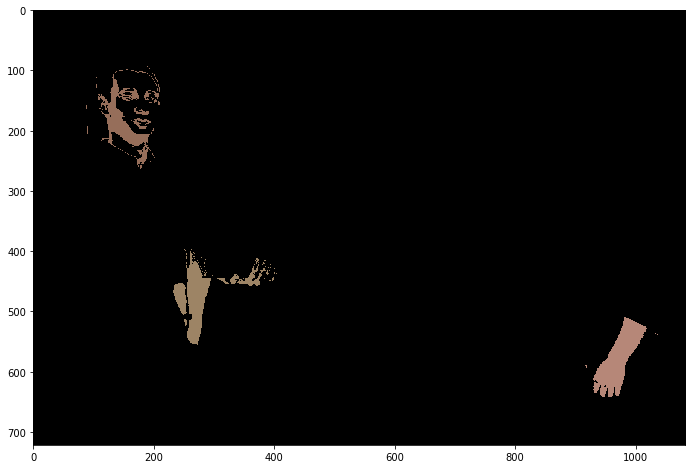

In [62]:
pix4_1 = np.zeros(pix4.shape, np.uint8)

for p, c in zip(data2, db_clusters):
    if c in near:
        pix4_1[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                              int(db.cluster_centers_[c, 3]), 
                              int(db.cluster_centers_[c, 4]))

ax = plt.subplot()
ax.imshow(pix4_1);
